In [12]:
import pandas as pd
import networkx as nx
import numpy as np
import community
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [2]:
data = pd.read_csv("../data/smalldata.csv")

In [21]:
top = 100

In [4]:
def update_nodes(node, plays):
    if graph.has_node(node):
            graph.node[node]['weight'] = plays
    else:
        graph.add_node(node)
        graph.node[node]['weight'] = plays

def update_edges(src, dst, n_common_users):
    if graph.has_edge(src,dst):
        graph.edge[src][dst]['weight'] = graph[src][dst]['weight'] + n_common_users
    else:
        graph.add_edge(src, dst)
        graph.edge[src][dst]['weight'] = n_common_users

In [5]:
groups = data.groupby('artist_name').aggregate({'plays': [np.sum]}).sort([ ('plays','sum') ], ascending=False)

In [6]:
top_artists, top_plays = groups.head(top).index, groups.head(top)['plays']['sum'].values

In [102]:
graph=nx.Graph()
for artistA, playsA in zip(top_artists[1:], top_plays[1:]):
    update_nodes(artistA, int(playsA) )
    users_per_artistA = data[data['artist_name'] == artistA]
    for artistB, playsB in zip(top_artists[1:], top_plays[1:]):
        if artistA == artistB: 
            continue
        users_per_artistB = data[data['artist_name'] == artistB]
        count = list(users_per_artistA.userid.isin(users_per_artistB.userid)).count(True)
        
        #print users_per_artistA.shape
        #print users_per_artistB.shape
        #print count
        if count > 1:
            temp = pd.merge(users_per_artistA, users_per_artistB, on='userid', how='inner')
            temp['total'] = temp['plays_x'] / temp['plays_y']
            
            update_nodes(artistB, int(playsB))
            update_edges(artistA, artistB, int(temp['total'].sum()) )

In [103]:
nx.write_graphml(graph.to_undirected(), 'output.graphml')

In [104]:
part = community.best_partition(graph)

In [105]:
values = [part.get(node) for node in graph.nodes()]

In [106]:
for i in  np.unique(values):
    for node in graph.nodes():
        if part.get(node) == i:
            print node,
            print "--",
    print
    print

los suaves --

metallica -- queen -- arch enemy -- moonspell -- rammstein -- evanescence -- children of bodom -- oasis -- dimmu borgir -- sonata arctica -- depeche mode -- anathema -- u2 -- kylie minogue -- coldplay -- dream theater -- apocalyptica -- muse -- amon amarth -- madonna -- franz ferdinand -- nightwish -- in flames --

yeah yeah yeahs -- mgmt -- kent -- kings of leon -- bloc party -- the strokes -- röyksopp -- arctic monkeys -- the kooks --

polar bear club --

nine inch nails -- bob dylan -- portishead -- boris -- the cure -- mogwai -- devendra banhart -- sigur rós -- led zeppelin -- norah jones -- beck -- the libertines -- the beatles -- my bloody valentine -- pink floyd -- the rolling stones -- deerhoof -- the clash -- johnny cash -- the brian jonestown massacre -- david bowie -- pj harvey -- the white stripes -- they might be giants --

rise against -- coheed and cambria -- blink-182 -- placebo -- linkin park -- fall out boy -- finch -- afi --

john pizzarelli --

sufjan

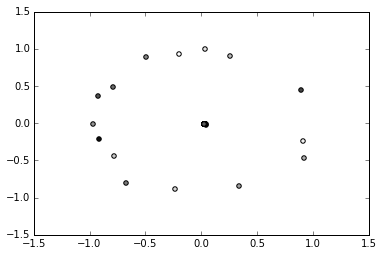

In [85]:
G=graph
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()